In [1]:
import torch
torch.__version__

c:\USERS\DILAB\ANACONDA3\ENVS\DL\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


'1.13.1+cpu'

In [2]:
from torch.utils.data import Dataset, DataLoader
# transforms 전처리 때 사용하는 메소드

MNIST 데이터셋 가져오기

In [3]:
import torchvision.transforms as transforms
from torchvision import datasets

In [4]:
mnist_transform = transforms.Compose([transforms.ToTensor(),
                                       transforms.Normalize(mean=(0.5,),std=(1.0,))])

In [5]:
trainset = datasets.MNIST(root=r'C:\Users\DILAB\쥬피터전용폴더\3분딥러닝파이토치맛\Readytoproject',
                          train=True, download=True, transform=mnist_transform)

In [6]:
testset = datasets.MNIST(root=r'C:\Users\DILAB\쥬피터전용폴더\3분딥러닝파이토치맛\Readytoproject',
                          train=False, download=True, transform=mnist_transform)

In [7]:
# 배치만큼 데이터 가지고 오기
train_loader = DataLoader(trainset, batch_size=8, shuffle=True, num_workers=2)
test_loader = DataLoader(testset, batch_size=8, shuffle=True, num_workers=2)

In [8]:
dataiter = iter(train_loader)
images, labels = next(dataiter)
images.shape, labels.shape
# 28 x 28 이미지, 이미지 커널 1개이므로 흑백, batch size = 8

(torch.Size([8, 1, 28, 28]), torch.Size([8]))

In [9]:
# 이미지 차원 축소, 0차원 축소 => 8개 배치 데이터 중 한 개만 가져옴
torch_image = torch.squeeze(images[0])
torch_image.shape

torch.Size([28, 28])

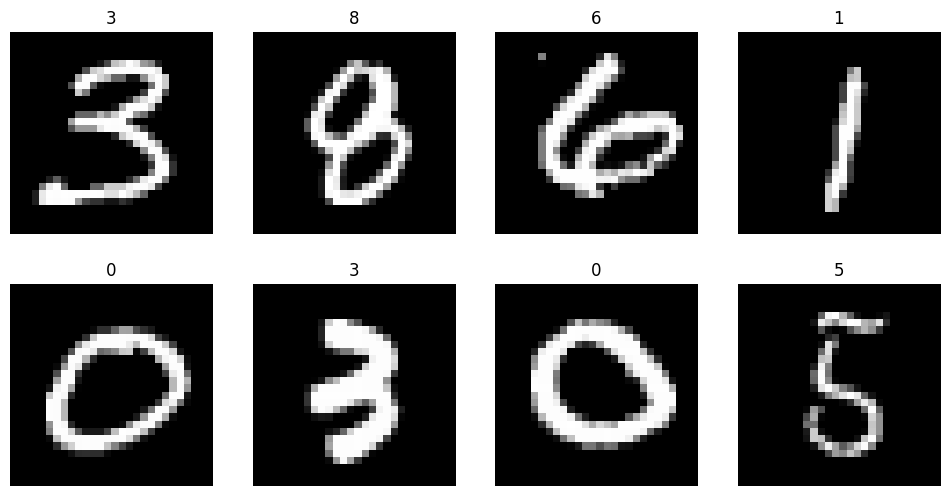

In [10]:
import matplotlib.pyplot as plt

figure = plt.figure(figsize=(12,6))
cols, rows = 4, 2
for i in range(1, cols*rows + 1):
    sample_idx = torch.randint(len(trainset),size=(1,)).item()
    img, label = trainset[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(label)
    plt.axis('off')
    plt.imshow(img.squeeze(), cmap='gray') # img.squeeze()를 통해 차원을 2차원을 맞춰줘야 한다.
plt.show()

신경망 구성
layer : 하나 이상의 텐서를 입력받아 하나 이상의 텐서를 출력
module : 한 개 이상의 계층이 모여서 구성
model : 한 개 이상의 모듈이 모여서 구성

torch.nn 패키지
가중치와 편향값들이 내부에서 자동으로 생성되는 레이어를 사용할 때 이용한다.

In [11]:
import torch.nn as nn
import torch

In [12]:
# 예제
input = torch.randn(128,20)
print(input)

m = nn.Linear(20,30)
print(m)

output = m(input)
print(output.size())

tensor([[-0.7346, -0.6762, -0.1548,  ...,  0.5997,  2.3933, -1.2170],
        [ 0.4148,  0.4180,  0.0041,  ..., -0.4744, -0.2784, -0.8554],
        [ 0.9383, -1.8642, -0.2258,  ..., -0.8611,  0.2752,  1.4248],
        ...,
        [ 0.9569,  1.0380, -0.2716,  ..., -0.3414, -1.1448, -0.6882],
        [-3.5014, -0.7916, -0.7064,  ...,  0.6185, -0.6512,  1.0666],
        [ 1.2063, -0.5615,  1.3066,  ...,  1.2700,  1.0531, -0.4585]])
Linear(in_features=20, out_features=30, bias=True)
torch.Size([128, 30])


In [13]:
# 컨볼루션 예제
input = torch.randn(20,16,50,100)
m = nn.Conv2d(16,33, 3, stride=2)
m = nn.Conv2d(16,33, (3,5), stride=(2,1),padding=(4,2))
m = nn.Conv2d(16,33, (3,5), stride=(2,1), padding=(4,2), dilation=(3,1))
print(m)

Conv2d(16, 33, kernel_size=(3, 5), stride=(2, 1), padding=(4, 2), dilation=(3, 1))


In [14]:
output = m(input)
output.size()

torch.Size([20, 33, 26, 100])

In [15]:
nn.Conv2d(in_channels=1, out_channels=20, kernel_size=5, stride=1)

Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))

In [16]:
layer = nn.Conv2d(1,20,5,1).to(torch.device('cpu'))

In [17]:
weight = layer.weight
weight.shape

torch.Size([20, 1, 5, 5])

In [18]:
# weight는 detach()를 통해 꺼내줘야 numpy() 변환 가능

weight = weight.detach()

In [19]:
# numpy() 변환 가능
weight = weight.numpy()

In [20]:
import numpy as np
np.squeeze(weight[0]).shape

(5, 5)

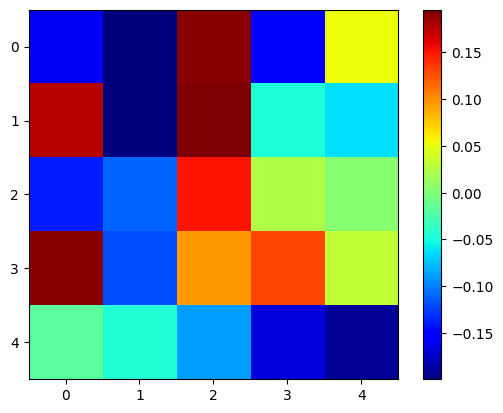

In [21]:
# 컨볼루션 계층 하나의 weight 값을 가져와서 컬러로 표현
from matplotlib import pyplot as plt
plt.imshow(weight[0,0,:,:],'jet')   # 5 x 5 만 선택, 'jet' : 컬러
plt.colorbar()
plt.show()

In [22]:
print(images.shape)
print(images[0].size())

input_image = torch.squeeze(images[0])
input_image.size()

torch.Size([8, 1, 28, 28])
torch.Size([1, 28, 28])


torch.Size([28, 28])

In [23]:
input_data = torch.unsqueeze(images[0], dim=0)
print(input_data.size())    # 1 1 28 28

output_data = layer(input_data) # layer = nn.Conv2d(1,20,5,1).to(torch.device('cpu'))
print('output_data', output_data.shape)   # 객체로 grad도 포함되어있음
output = output_data.data       # data값만 가져옴, shape 일치
print('output', output.shape)
output_np = output.numpy()
output_np.shape

torch.Size([1, 1, 28, 28])
output_data torch.Size([1, 20, 24, 24])
output torch.Size([1, 20, 24, 24])


(1, 20, 24, 24)

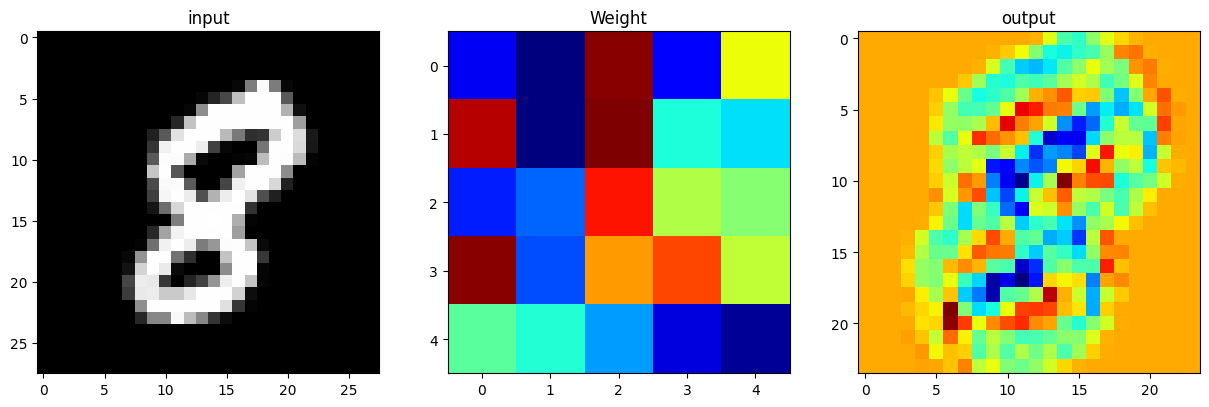

In [24]:
plt.figure(figsize=(15,30))

plt.subplot(131)
plt.title('input')
plt.imshow(input_image, 'gray')    # input_image: 28,28
# print(input_image.shape)

plt.subplot(132)
plt.title('Weight')
# plt.imshow(np.squeeze(weight[0]), 'gray')
plt.imshow(weight[0,0,:,:], 'jet')     # 뒤의 것만 쓰겠다.

plt.subplot(133)
plt.title('output')
plt.imshow(output[0,0,:,:],'jet')

In [25]:
# 풀링 계층
import torch.nn.functional as F

pool = F.max_pool2d(output,2,2)
output.shape, pool.shape        # 2x2 이므로 반쪽이 되었음을 확인할 수 있다.

(torch.Size([1, 20, 24, 24]), torch.Size([1, 20, 12, 12]))

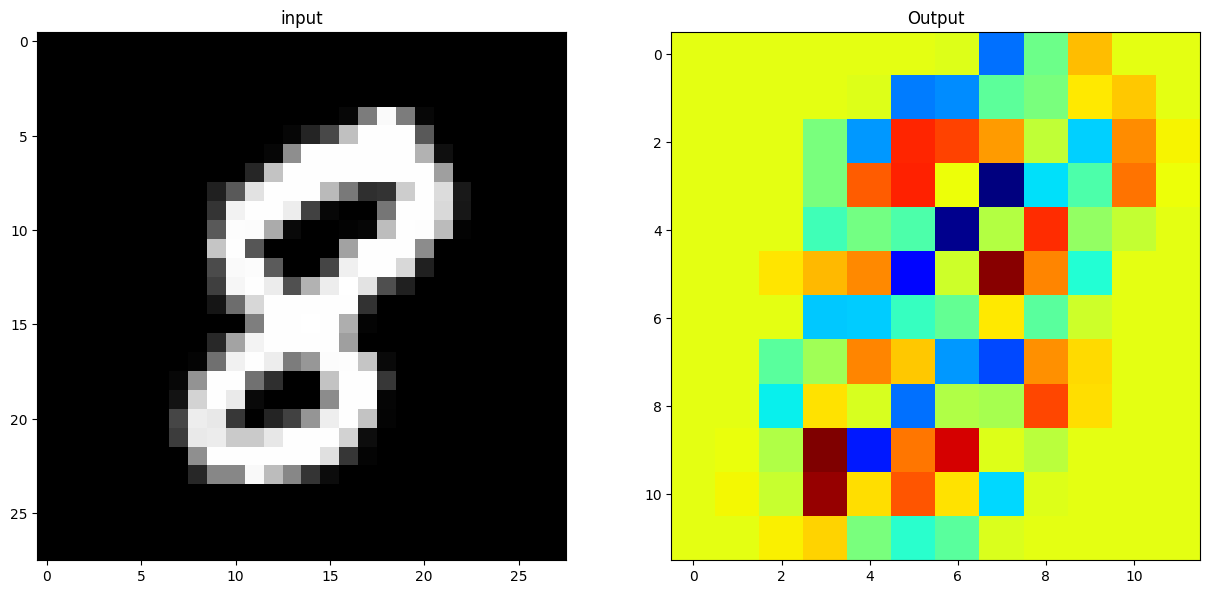

In [26]:
plt.figure(figsize=(15,30))

plt.subplot(121)
plt.title('input')
plt.imshow(input_image, 'gray')    # input_image: 28,28
# print(input_image.shape)

plt.subplot(122)
plt.title('Output')
# plt.imshow(np.squeeze(weight[0]), 'gray')
plt.imshow(pool[0,0,:,:], 'jet')     # 뒤의 것만 쓰겠다.


In [27]:
# 선형 레이어 (Linear layers)
flatten = input_image.view(1,28*28)
flatten.shape

torch.Size([1, 784])

In [28]:
lin = nn.Linear(784,10)(flatten)
lin.shape

torch.Size([1, 10])

In [29]:
lin

tensor([[ 0.2228,  0.0057,  0.1246, -0.1766,  0.3055,  0.0179,  0.1742,  0.0922,
         -0.1835, -0.4603]], grad_fn=<AddmmBackward0>)

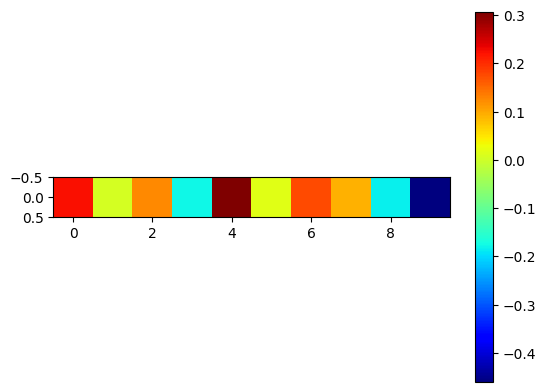

In [30]:
plt.imshow(lin.detach(),'jet')
plt.colorbar()

In [31]:
# 비선형 활성화
with torch.no_grad():
    flatten = input_image.view(1,28*28)
    lin = nn.Linear(784,10)(flatten)
    softmax = F.softmax(lin, dim=1)
softmax

tensor([[0.1169, 0.0931, 0.1358, 0.0698, 0.1078, 0.1231, 0.0863, 0.0769, 0.0939,
         0.0962]])

In [32]:
torch.argmax(softmax) # 7번이 가장 높다.

tensor(2)

In [33]:
# 렐루
inputs = torch.randn(4,3,28,28)
layer = nn.Conv2d(3,20,5,1)
output = F.relu(layer(inputs))
output.shape

torch.Size([4, 20, 24, 24])

In [34]:
# 모델 정의, nn.Module

# nn.Module
# __init__()
# forward()

In [35]:
class Model(nn.Module):
    def __init__(self, inputs):
        super(Model, self).__init__()
        self.layer = nn.Linear(inputs,1)
        self.activation = nn.Sigmoid()
    
    def forward(self,x):
        x = self.layer(x)
        x = self.activation(x)
        return x

In [36]:
# Linear, Sigmoid() 계층이 있다는 것을 Children을 통해 알 수 있다.
model = Model(1)
print(list(model.children()))
print(list(model.modules()))

[Linear(in_features=1, out_features=1, bias=True), Sigmoid()]
[Model(
  (layer): Linear(in_features=1, out_features=1, bias=True)
  (activation): Sigmoid()
), Linear(in_features=1, out_features=1, bias=True), Sigmoid()]


In [37]:
# 신경망 정의
class Model(nn.Module):
    def __init__(self):
        super(Model,self).__init__()
        self.layer1 = nn.Sequential(nn.Conv2d(in_channels=3, out_channels=64, kernel_size=5),
                                    nn.ReLU(inplace=True),
                                    nn.MaxPool2d(2))
        self.layer2 = nn.Sequential(nn.Conv2d(in_channels=64, out_channels=30, kernel_size=5),
                                    nn.ReLU(inplace=True),
                                    nn.MaxPool2d(2))
        self.layer3 = nn.Sequential(nn.Linear(in_features=30*5*5, out_features=10, bias=True),
                                    nn.ReLU(inplace=True),
                                    nn.MaxPool2d(2))
        def forward(self,x):
            x = self.layer1(x)
            x = self.layer2(x)
            x = x.view(x.shape[0],-1)       # reshape 역할
            x = self.layer3(x)
            return x

In [38]:
# 모델 파라미터

# 손실함수

# torch.nn.BCELoss : 이중분류(Binary classification)
# torch.nn.CrossEntropyLoss : 다중분류
# torch.nn.MSELoss : 회귀모델

In [39]:
criterion = nn.MSELoss()
criterion2 = nn.CrossEntropyLoss()

In [40]:
# 옵티마이져(Optimizer)

# 손실함수 기반으로 모델이 어떻게 업데이트 되어야 하는지 결정
# step() 을 통한 모델 업데이트
# torch.optim.Optimizer(params, default) 클래스 사용
# zero_grad()를 이용해 기울기 0으로 설정
# torch.optim.lr_scheduler: epoch에 따라 lr(학습률) 조절
# 주요 옵티마이져 : optim.Adadelta, optim.Adagrad, optim.Adam, optim.RMSprop, optim.SGD

In [41]:
# 학습률 스케줄러 : torch.optim.lr_scheduler
# 학습시 특정 조건에 따라 학습률 조정하며 최적화 진행
# 일정 횟수 이상 되면 학습률을 감소시키거나 최소점 근처에 가면 학습률을 줄이는 등 가능케 함


In [42]:
# 지표(Metrics)

!pip install torchmetrics

In [43]:
import torchmetrics

preds = torch.randn(10,5).softmax(dim=-1)
target = torch.randint(5,(10,))
print(target.shape)
print(preds, target)

torch.Size([10])
tensor([[0.0066, 0.1090, 0.3394, 0.5052, 0.0398],
        [0.3849, 0.0153, 0.0661, 0.0293, 0.5044],
        [0.1259, 0.2416, 0.1375, 0.1727, 0.3223],
        [0.3503, 0.0261, 0.4924, 0.0313, 0.0998],
        [0.6649, 0.0431, 0.2462, 0.0148, 0.0310],
        [0.2444, 0.1487, 0.1130, 0.2271, 0.2668],
        [0.0271, 0.5915, 0.1833, 0.0960, 0.1021],
        [0.3710, 0.1769, 0.1591, 0.1926, 0.1004],
        [0.0735, 0.2119, 0.5350, 0.1481, 0.0314],
        [0.0201, 0.0151, 0.7349, 0.0127, 0.2173]]) tensor([0, 3, 3, 0, 3, 1, 2, 3, 4, 3])


In [44]:
# 정확도 직접 구하기
(torch.argmax(preds ,dim=1) == target).float().mean()

tensor(0.)

In [45]:
# torchmetrcis.Accuracy 모듈 사용하기
metric = torchmetrics.Accuracy(task="multiclass",num_classes=5)
metric(preds,target)

tensor(0.)

In [46]:
# 선형 회귀 모델(LinearRegression Model)

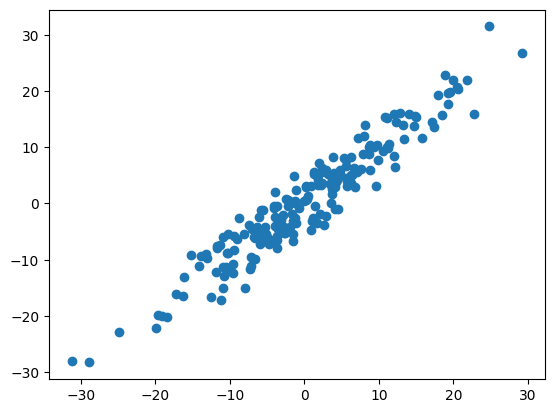

In [47]:
# 데이터 생성
X = torch.randn(200,1)*10
y = X+3*torch.randn(200,1)
plt.scatter(X.numpy(), y.numpy())
plt.show()

In [48]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.lin = nn.Linear(1,1)
    def forward(self,x):
        pred = self.lin(x)
        return pred

In [49]:
model = LinearRegressionModel()
print(model)
print(list(model.parameters()))

LinearRegressionModel(
  (lin): Linear(in_features=1, out_features=1, bias=True)
)
[Parameter containing:
tensor([[-0.0984]], requires_grad=True), Parameter containing:
tensor([0.0749], requires_grad=True)]


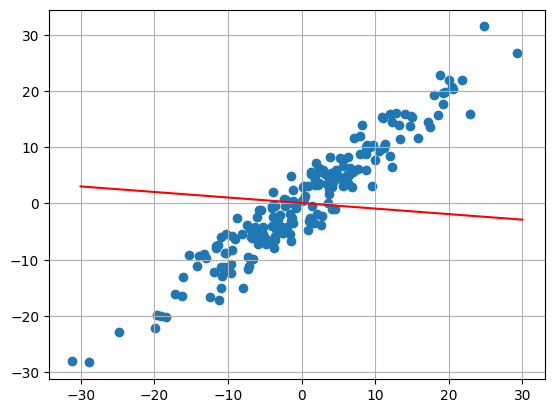

In [50]:
w,b = model.parameters()
w1,b1 = w[0].item(), b[0].item()
x1 = np.array([-30,30])     # x좌표 2개
y1 = x1*w1 + b1             # y좌표 2개
plt.plot(x1,y1,'r')         # 선 긋기
plt.scatter(X,y)
plt.grid()
plt.show()

In [51]:
from torch import optim
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [52]:
epochs = 100
losses = []

for epoch in range(epochs):
    # X,y : 200x1
    pred = model(X)
    loss = criterion(pred,y)
    losses.append(loss.item())  # loss는 tensor 값이므로 item()을 이용해서 상수만 뽑아온다.
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()


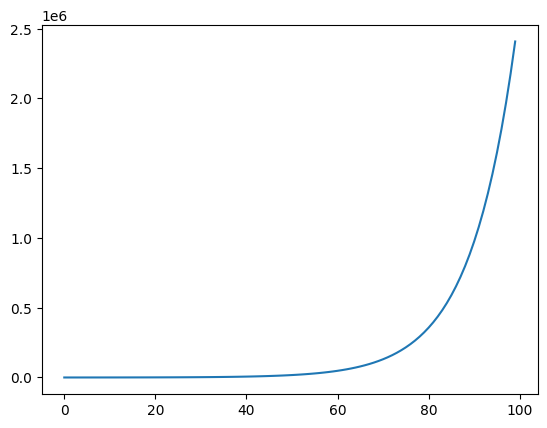

In [53]:
plt.plot(range(len(losses)),losses)
plt.show()

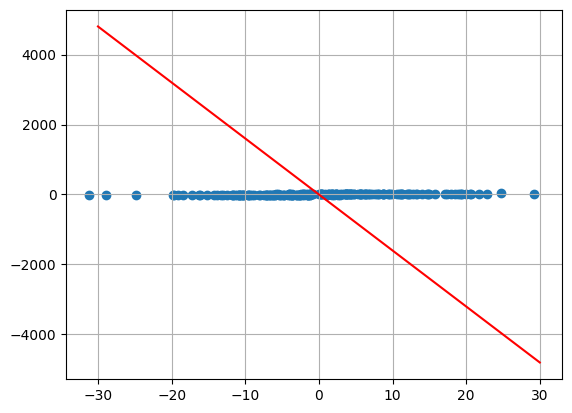

In [54]:

w1,b1 = w[0].item(), b[0].item()       # item()으로 상수만 가져올 수 있다.
x1 = np.array([-30,30])     # x좌표 2개
y1 = x1*w1 + b1             # y좌표 2개
plt.plot(x1,y1,'r')         # 선 긋기
plt.scatter(X,y)
plt.grid()
plt.show()

In [55]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

In [56]:
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5))])   # mean:0.5, std:0.5


In [57]:
trainset = datasets.FashionMNIST(root=r'C:\Users\DILAB\쥬피터전용폴더\3분딥러닝파이토치맛\Readytoproject',
                                 train=True, download=True,
                                 transform=transform)   # Tensor()로 바꾸고 mean,std = 0.5
testset = datasets.FashionMNIST(root=r'C:\Users\DILAB\쥬피터전용폴더\3분딥러닝파이토치맛\Readytoproject',
                                 train=False, download=True,
                                 transform=transform)


In [58]:
# DataLoader()로 배치로 나눠주기 
train_loader = DataLoader(trainset, batch_size=128, shuffle=True,num_workers=2)
test_loader = DataLoader(testset, batch_size=128, shuffle=False,num_workers=2)
# num_worker는 어떤 역할을 할까? => gpu, cpu 할당하는 역할

In [59]:
# next(iter())하면 리스트에 있는 값을 하나씩 꺼내온다는 의미
# 즉 여기서는 첫번째 배치에 해당
images, labels = next(iter(train_loader))
images.shape, labels.shape

(torch.Size([128, 1, 28, 28]), torch.Size([128]))

tensor(7)


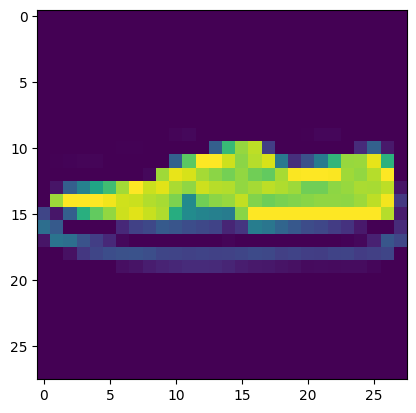

In [60]:
# plot 선, scatter 점, imshow 그림
plt.imshow(images[0,0,:,:])
print(labels[0])

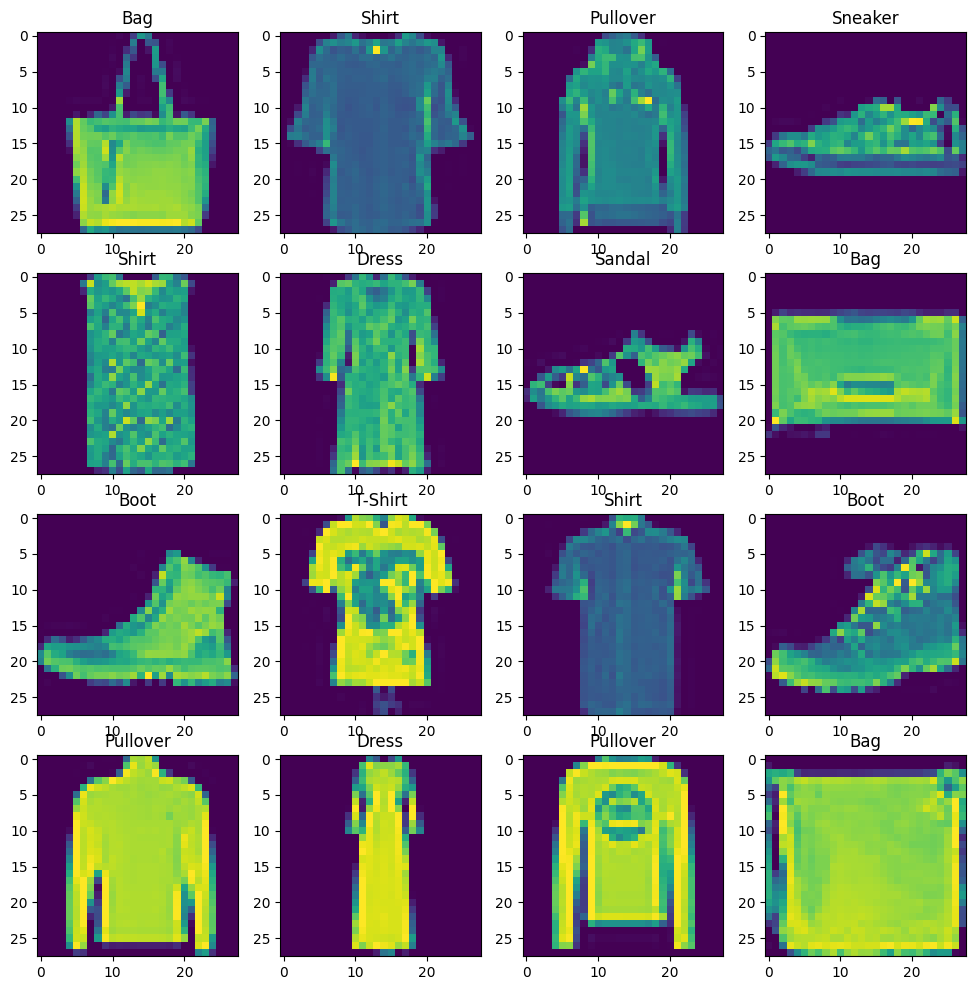

In [61]:
labels_map = {
    0:'T-Shirt',
    1:'Trouser',
    2:'Pullover',
    3:'Dress',
    4:'Coat',
    5:'Sandal',
    6:'Shirt',
    7:'Sneaker',
    8:'Bag',
    9:'Boot'
}

figure = plt.figure(figsize=(12,12))
cols, rows = 4, 4
for i in range(1, cols*rows + 1):   # 1부터 16까지
    image = images[i].squeeze()     # images.shape : [128,1,28,28]
    label_idx = labels[i].item()    # labels.shape : [128]
    label = labels_map[label_idx]
    
    figure.add_subplot(rows,cols,i)
    plt.title(label)
    plt.imshow(image)
    
plt.show()

In [62]:
# 모델 정의
class NeuralNet(nn.Module):
    def __init__(self):
        super(NeuralNet,self).__init__()
        # 컨볼루션 계층 :  특징 추출    
        self.conv1 = nn.Conv2d(1,6,3)   # 128,1,28,28 -> 128,6,26,26
        self.conv2 = nn.Conv2d(6,16,3)  # 128,16,24,24
        # 리니어 계층 : 클래스 분류
        self.fc1 = nn.Linear(16*5*5,120)
        self.fc2 = nn.Linear(120,84)
        self.fc3 = nn.Linear(84,10)     # 10개의 클래스로 분류
    
    def forward(self,x):
        x = F.max_pool2d(F.relu(self.conv1(x)),(2,2))   # input, kernel size
        x = F.max_pool2d(F.relu(self.conv2(x)),2)
        x = x.view(-1,self.num_flat_features(x))    # reshape()를 사용하면 복사본이 만들어질 수 있기 때문에 view()사용
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
    def num_flat_features(self,x):
        size = x.size()[1:]
        num_features = 1
        for s in size:
            num_features *= s
        
        return num_features

In [63]:
# shape과 size()의 차이점 : shape 
a = torch.randn(100,2)
a.shape, a.size()[:]

(torch.Size([100, 2]), torch.Size([100, 2]))

In [64]:
net = NeuralNet()
print(net)

NeuralNet(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [65]:
print(list(net.parameters()))
print(list(net.modules()))

[Parameter containing:
tensor([[[[-0.1181,  0.3306,  0.1194],
          [-0.3161,  0.2652,  0.1093],
          [ 0.3140,  0.2980, -0.2587]]],


        [[[ 0.3046,  0.3124, -0.1950],
          [ 0.2093, -0.3229, -0.2580],
          [-0.2184, -0.3021,  0.1324]]],


        [[[-0.3302,  0.1680, -0.0620],
          [-0.1528,  0.1203, -0.1408],
          [ 0.2591, -0.0271, -0.2929]]],


        [[[ 0.0618,  0.1280,  0.0435],
          [-0.1612,  0.1330,  0.1963],
          [-0.0993, -0.2575, -0.2545]]],


        [[[-0.1533, -0.2548, -0.0755],
          [ 0.2782,  0.2922, -0.2370],
          [ 0.1345,  0.1590,  0.0835]]],


        [[[ 0.0056,  0.2779, -0.0285],
          [ 0.2483, -0.0698, -0.3296],
          [-0.2398, -0.0725,  0.0560]]]], requires_grad=True), Parameter containing:
tensor([-0.3255, -0.0148, -0.0068, -0.0151, -0.2703, -0.1917],
       requires_grad=True), Parameter containing:
tensor([[[[ 0.1345, -0.1004, -0.0768],
          [ 0.0495, -0.0517,  0.0899],
          [-0.0832

In [66]:
print(list(net.parameters())[0].data,list(net.parameters())[0].data.grad)

tensor([[[[-0.1181,  0.3306,  0.1194],
          [-0.3161,  0.2652,  0.1093],
          [ 0.3140,  0.2980, -0.2587]]],


        [[[ 0.3046,  0.3124, -0.1950],
          [ 0.2093, -0.3229, -0.2580],
          [-0.2184, -0.3021,  0.1324]]],


        [[[-0.3302,  0.1680, -0.0620],
          [-0.1528,  0.1203, -0.1408],
          [ 0.2591, -0.0271, -0.2929]]],


        [[[ 0.0618,  0.1280,  0.0435],
          [-0.1612,  0.1330,  0.1963],
          [-0.0993, -0.2575, -0.2545]]],


        [[[-0.1533, -0.2548, -0.0755],
          [ 0.2782,  0.2922, -0.2370],
          [ 0.1345,  0.1590,  0.0835]]],


        [[[ 0.0056,  0.2779, -0.0285],
          [ 0.2483, -0.0698, -0.3296],
          [-0.2398, -0.0725,  0.0560]]]]) None


In [67]:
params = list(net.parameters())
print(len(params))
print(params[0].size())

10
torch.Size([6, 1, 3, 3])


In [97]:
criterion = nn.CrossEntropyLoss()       # 클래스 분류이므로
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)


In [98]:
total_batch = len(train_loader)
print(total_batch)  # 468번 iteration을 돔

469


In [99]:
for epoch in range(10):
    running_loss = 0.0
    
    for i, data in enumerate(train_loader):
        inputs, labels =data
        
        optimizer.zero_grad()
        
        outputs = net(inputs)
        loss = criterion(outputs,labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()     # loss.item()을 해줘야 한다.
        
        if i % 100 == 99:
            print('Epoch: {}, iter: {}, Loss : {}'.format(epoch+1,i+1,running_loss))
            running_loss = 0.0

Epoch: 1, iter: 100, Loss : 59.42126706242561
Epoch: 1, iter: 200, Loss : 53.230715185403824
Epoch: 1, iter: 300, Loss : 49.71629846096039
Epoch: 1, iter: 400, Loss : 45.266033470630646
Epoch: 2, iter: 100, Loss : 44.497788429260254
Epoch: 2, iter: 200, Loss : 41.484730303287506
Epoch: 2, iter: 300, Loss : 40.548825442790985
Epoch: 2, iter: 400, Loss : 40.36973947286606
Epoch: 3, iter: 100, Loss : 36.52643957734108
Epoch: 3, iter: 200, Loss : 37.65736049413681
Epoch: 3, iter: 300, Loss : 36.894102826714516
Epoch: 3, iter: 400, Loss : 36.04692453145981
Epoch: 4, iter: 100, Loss : 33.789658948779106
Epoch: 4, iter: 200, Loss : 33.33838875591755
Epoch: 4, iter: 300, Loss : 33.213501155376434
Epoch: 4, iter: 400, Loss : 33.80666618049145
Epoch: 5, iter: 100, Loss : 31.0361335426569
Epoch: 5, iter: 200, Loss : 31.123532339930534
Epoch: 5, iter: 300, Loss : 31.51782977581024
Epoch: 5, iter: 400, Loss : 31.23389506340027
Epoch: 6, iter: 100, Loss : 29.364794239401817
Epoch: 6, iter: 200, Loss

In [71]:
# nn.Conv2d, 컨볼루션 계층에 대한 이해
m = nn.Conv2d(16,33,3,stride=1,padding=1) # inchannel, outchannel, kernel
# 채널수를 16->33으로 늘린다. -> 두꺼워진다. CNN 모델의 그림을 보면 알 수 있을 것이다.
input = torch.randn(20,16,50,100)   # batch, inchannel, width, height
output = m(input)
output.shape    # 커널크기가 3이면(3,3) padding=1로 해줘야 전후 크기가 일치한다.

torch.Size([20, 33, 50, 100])

In [72]:
# 모델의 저장 및 로드
# torch.save()
# torch.load()
net.state_dict()

OrderedDict([('conv1.weight',
              tensor([[[[-0.1825,  0.4344,  0.1629],
                        [-0.3728,  0.3843,  0.1276],
                        [ 0.2731,  0.4009, -0.2704]]],
              
              
                      [[[ 0.0536, -0.2128, -0.6787],
                        [-0.0489, -0.8742, -0.7880],
                        [-0.3889, -0.7761, -0.3231]]],
              
              
                      [[[-0.6116, -0.2738, -0.5537],
                        [-0.4288, -0.3273, -0.6427],
                        [ 0.0738, -0.3753, -0.6713]]],
              
              
                      [[[-0.0531, -0.0267,  0.0315],
                        [-0.3384, -0.1048,  0.1311],
                        [-0.3303, -0.5406, -0.3597]]],
              
              
                      [[[-0.1711, -0.2767, -0.2176],
                        [ 0.3290,  0.3443, -0.3571],
                        [ 0.2195,  0.2387,  0.0062]]],
              
              
               

In [100]:
PATH = './fashion_mnist.pth'
torch.save(net.state_dict(),PATH)

In [101]:
net = NeuralNet()   # 객체 생성
net.load_state_dict(torch.load(PATH))   # 해당 파라미터값을 객체에 적용

<All keys matched successfully>

In [75]:
list(net.parameters())

[Parameter containing:
 tensor([[[[-0.1825,  0.4344,  0.1629],
           [-0.3728,  0.3843,  0.1276],
           [ 0.2731,  0.4009, -0.2704]]],
 
 
         [[[ 0.0536, -0.2128, -0.6787],
           [-0.0489, -0.8742, -0.7880],
           [-0.3889, -0.7761, -0.3231]]],
 
 
         [[[-0.6116, -0.2738, -0.5537],
           [-0.4288, -0.3273, -0.6427],
           [ 0.0738, -0.3753, -0.6713]]],
 
 
         [[[-0.0531, -0.0267,  0.0315],
           [-0.3384, -0.1048,  0.1311],
           [-0.3303, -0.5406, -0.3597]]],
 
 
         [[[-0.1711, -0.2767, -0.2176],
           [ 0.3290,  0.3443, -0.3571],
           [ 0.2195,  0.2387,  0.0062]]],
 
 
         [[[ 0.0391,  0.2994, -0.0402],
           [ 0.2725, -0.0753, -0.3579],
           [-0.2590, -0.0993,  0.0190]]]], requires_grad=True),
 Parameter containing:
 tensor([-0.1622,  0.2783,  0.2424,  0.1272, -0.1105, -0.1590],
        requires_grad=True),
 Parameter containing:
 tensor([[[[ 0.1302, -0.1066, -0.0856],
           [ 0.0525, -0.

In [76]:
# 모델 테스트

In [93]:
def imshow(image):
    image = image/2 + 0.5       # + 0.5만큼 밝아진다.
    npimg = image.numpy()       # plt.imshow()하려면 넘파이로 형변환 필요
    
    fig = plt.figure(figsize=(16,8))
    plt.imshow(np.transpose(npimg,(1,2,0))) # rgb -> gbr
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([128, 1, 28, 28])


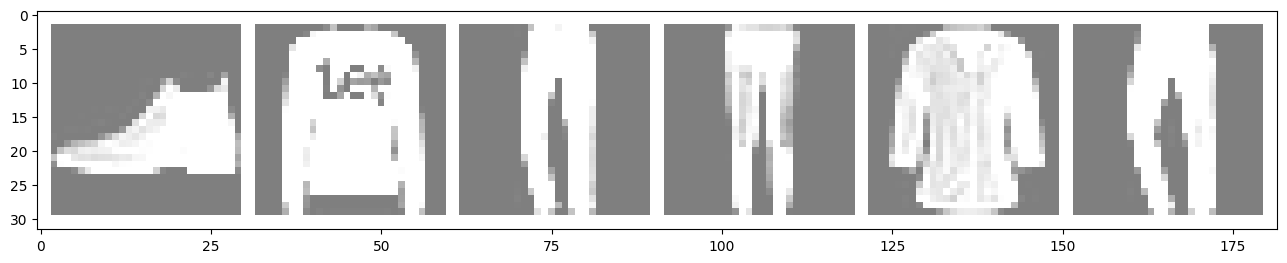

In [110]:
import torchvision


dataiter = iter(test_loader)
images, labels = next(dataiter)
print(images.shape)     # batch size 128개의 이미지가 나와야 함.
imshow(torchvision.utils.make_grid(images[:6])) # 6개만 그리드로 보여줘

In [111]:
# 이미지 분류를 위한 모델 사용
outputs = net(images)   # 128개의 이미지

_, pred = torch.max(outputs,1)  # _에는 max값이 저장되고 pred에는 max값의 인덱스가 저장된다.
images.shape, _.shape, pred.shape

(torch.Size([128, 1, 28, 28]), torch.Size([128]), torch.Size([128]))

In [119]:
pred

tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5, 7, 3, 4, 1, 2, 6, 8, 0, 2, 7, 7, 5,
        1, 2, 6, 0, 9, 4, 8, 8, 3, 3, 8, 0, 7, 5, 7, 9, 6, 1, 6, 7, 4, 7, 2, 1,
        2, 6, 4, 4, 5, 8, 2, 2, 8, 4, 8, 0, 7, 7, 8, 5, 1, 1, 3, 4, 7, 8, 7, 0,
        2, 6, 4, 3, 1, 2, 8, 4, 1, 8, 5, 9, 5, 0, 3, 2, 0, 2, 5, 3, 6, 7, 1, 8,
        0, 1, 2, 2, 3, 6, 7, 6, 7, 8, 5, 7, 9, 4, 2, 5, 7, 0, 5, 2, 8, 6, 7, 8,
        0, 0, 9, 9, 3, 0, 8, 4])

In [129]:
prediction = [labels_map[int(i)] for i in pred[:6]] # tensor형이기 때문에 int형으로 바꿔줘야 한다.
labeling = [labels_map[int(i)] for i in labels[:6]]
print(prediction)
print(labeling)

['Boot', 'Pullover', 'Trouser', 'Trouser', 'Shirt', 'Trouser']
['Boot', 'Pullover', 'Trouser', 'Trouser', 'Shirt', 'Trouser']


In [118]:
acc= (pred==labels).float().mean()      # boolean을 float형으로 바꿔주고 평균을 구해야한다.
print('정확도=',acc.item()*100)

정확도= 87.5


In [130]:
correct = 0
total = 0
with torch.no_grad():   # 이미학습이 되었기때문에 그리고 정확도만 계산할것이기 때문에
    for data in test_loader:    # 배치만큼 나눠준 데이터
        images, labels = data
        outputs  = net(images)
        _, pred = torch.max(outputs,1)
        total += labels.size(0)
        correct += (pred == labels).sum().item()
        
print(correct/total*100)    # 총 개수분의 맞은 개수 * 100(%)
        

89.02


16